<h1 align=center><font size = 5> New York Taxi Analysis</font></h1>

## 1. Introduction

A taxi company tackle a problem is how to assign the cabs to passengers efficiently. One of main issue is determining the duration of the current trip so it can predict when the cab will be free for the next trip. You are challenged to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission. To build the best model, you would do analysis to find the best features that have relative with trip duration of taxi. In this project, you will practice data analysis and data visualization skill using Python such as: describe the data, handle missing value, data cleansing, feature engineer, feature selection to get insights about the data and determine how different variables are dependent on the target variable **Trip Duration**.

## 2. Data description


### File descriptions
train.csv - contains 1458644 trip records

weather_data_nyc.csv - the weather information in each day of trip

fastest_routes_train_part_1.csv

fastest_routes_train_part_2.csv


### Data fields
#### train.csv:
- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor - because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

- trip_duration - duration of the trip in seconds. Our target feature in the training data is measured in seconds

#### weather_nyc.csv

Weather data collected from the National Weather Service. It contains the first six months of 2016, for a weather station in central park. It contains for each day the minimum temperature, maximum temperature, average temperature, precipitation, new snow fall, and current snow depth. The temperature is measured in Fahrenheit and the depth is measured in inches. T means that there is a trace of precipitation.

- date : date of collecting data
- maximum temperature
- minimum temperature
- average temperature
- precipitation
- snow fall
- snow depth

#### fastest routes

This is suggested information about the fastest route from starting street to ending street for a trip that will help you estimate the duration.

- id - a unique identifier for each trip
- starting_street - a street when start the trip
- end_street - a street at end of the trip
- total_distance
- total_travel_time
- number_of_steps
- street_for_each_step
- distance_per_step
- travel_time_per_step
- step_maneuvers
- step_direction
- step_location_list



<h1 align=center><font size = 5>Project Requirements</font></h1>

Complete following tasks in this projects:



### Import Python Package

In [73]:
# write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### <span style="color:blue">1.Load data</span>
- Load trip data that describes above using DataFrame in Pandas

In [74]:
#write your code here
df = pd.read_csv('data/trip.csv')

In [75]:
print (df.shape)
print (df.dtypes)
print (df.columns)

(1458644, 11)
id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object
Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')


In [76]:
df.head(10)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,N,443
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,N,341
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,N,1551
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,N,255
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,N,1225


In [77]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [78]:
non_num_cols = ['id','pickup_datetime','dropoff_datetime','store_and_fwd_flag']
print(df[non_num_cols].count())

id                    1458644
pickup_datetime       1458644
dropoff_datetime      1458644
store_and_fwd_flag    1458644
dtype: int64


### <span style="color:blue">2.Reformat data type</span>
- Some datatime fields have wrong data types, write your code to change to correct format.

In [79]:
#write your code here
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

### <span style="color:blue">3.Descriptive Statistics </span>
- Using Descriptive Statistics to find some insights in 3 tables. Write your finding in the report

In [80]:
#write your code here

#### 3.1. Univariate Analysis
- Univariate analysis is the simplest form of analyzing data. “Uni” means “one”, so in other words your data has only one variable. It doesn’t deal with causes or relationships (unlike regression) and it’s major purpose is to describe; it takes data, summarizes that data and finds patterns in the data. 
- Your objective is finding features that correlate with trip duration and using these to predict duration of taxi trip. In first step, you must get more understand about each column (feature) in train.csv that will help you find best features.



##### 3.1.1. Distribution of trip duration
- Visualize the distribution of trip duration. It is better if you transform duration time to log10
- Write your findings

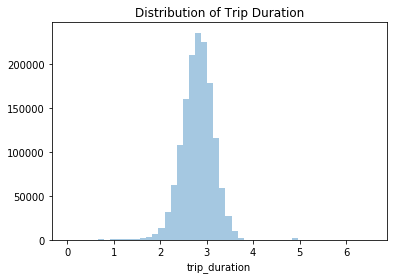

In [81]:
#write your code here
import math
df['trip_duration'] = df['trip_duration'].apply(lambda a: math.log10(a))
sns.distplot(df['trip_duration'], kde=False)
plt.title('Distribution of Trip Duration')
plt.show()

##### 3.1.2. Pickup latitude and Pickup longitude
- Use data visualization and write your findings 

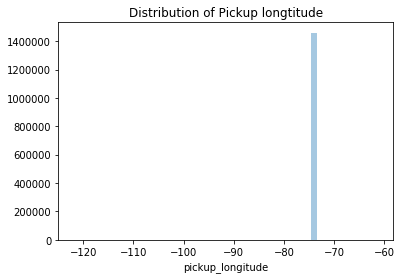

In [82]:
#write your code here
sns.distplot(df['pickup_longitude'], kde=False)
plt.title('Distribution of Pickup longtitude')
plt.show()

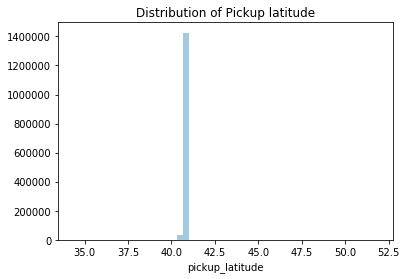

In [83]:
sns.distplot(df['pickup_latitude'], kde=False)
plt.title('Distribution of Pickup latitude')
plt.show()

##### 3.1.3. Dropoff latitude and Dripoff longitude
- Use data visualization and write your findings 

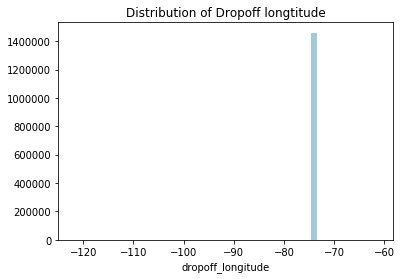

In [84]:
#write your code here
sns.distplot(df['dropoff_longitude'],kde=False)
plt.title('Distribution of Dropoff longtitude')
plt.show()

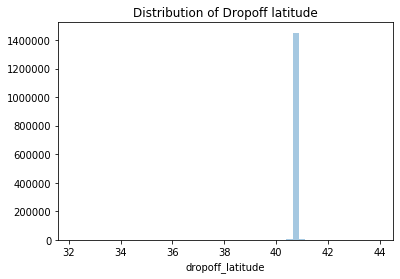

In [85]:
sns.distplot(df['dropoff_latitude'], kde=False)
plt.title('Distribution of Dropoff latitude')
plt.show()

##### 3.1.4. Pickup datatime and Dropoff datetime
-  its better to visualize the trips by hour, day, week, month...

In [86]:
#write your code here
import datetime as dt
# print(df['pickup_datetime'].nunique())
# print(df['dropoff_datetime'].nunique())
df['pickup_day_name'] = df['pickup_datetime'].dt.day_name()
df['dropoff_day_name'] = df['dropoff_datetime'].dt.day_name()
print(df['pickup_day_name'].value_counts())
print(df['dropoff_day_name'].value_counts())

Friday       223533
Saturday     220868
Thursday     218574
Wednesday    210136
Tuesday      202749
Sunday       195366
Monday       187418
Name: pickup_day_name, dtype: int64
Friday       223031
Saturday     220902
Thursday     217746
Wednesday    209790
Tuesday      202518
Sunday       197224
Monday       187433
Name: dropoff_day_name, dtype: int64


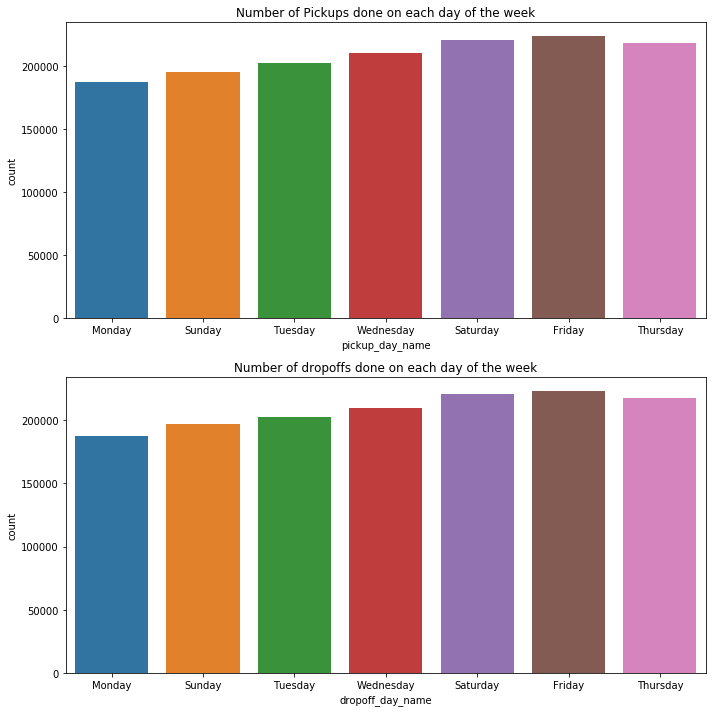

In [87]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10)) 

sns.countplot(x='pickup_day_name',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week') 

sns.countplot(x='dropoff_day_name',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week') 

plt.tight_layout()

In [88]:
def timezone(x):
    if x >= dt.time(4,0,1) and x <= dt.time(10,0,0):
        return 'morning'
    if x >= dt.time(10,0,1) and x <= dt.time(16,0,0):
        return 'midday'
    if x >= dt.time(16,0,1) and x <= dt.time(22,0,0):
        return 'evening'
    if x >= dt.time(22,0,1) and x <= dt.time(4,0,0):
        return 'late night'

df['pickup_timezone'] = df['pickup_datetime'].apply(lambda x: timezone(dt.datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S").time()))
df['dropoff_timezone'] = df['dropoff_datetime'].apply(lambda x: timezone(dt.datetime.strptime(str(x),"%Y-%m-%d %H:%M:%S").time()))

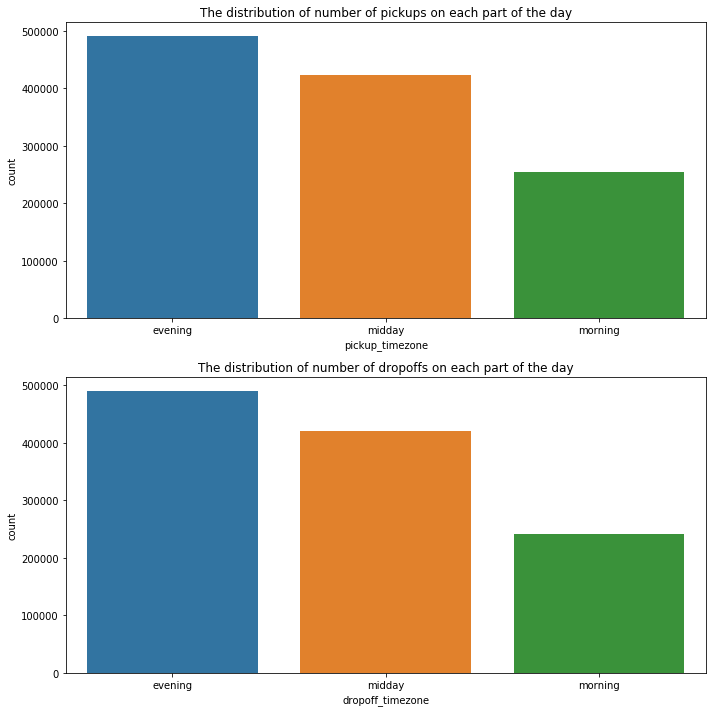

In [90]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10)) 

sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day') 

sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day') 

plt.tight_layout()

In [44]:
figure, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(10,10))

sns.countplot(x='pickup_day_name', data=df['pickup_day_name'], ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')

sns.countplot(x='dropoff_day', data=df['dropoff_day_name'], ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')

plt.tight_layout()

ValueError: Could not interpret input 'pickup_day_name'

##### 3.1.5. Vendor 
- use data visualization and write your findings 

In [91]:
#write your code here

##### 3.1.6 Passenger_count

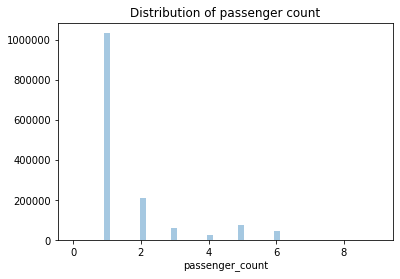

In [92]:
#write your code here
sns.distplot(df['passenger_count'], kde=False)
plt.title('Distribution of passenger count')
plt.show()

##### 3.1.7 Add more analysis

In [93]:
#write your code here

#### 3.2. Bivariate Analysis and Multivariate Analysis
- Bivariate analysis is the simultaneous analysis of two variables (attributes). It explores the concept of relationship between two variables, whether there exists an association and the strength of this association, or whether there are differences between two variables and the significance of these differences.
<br><br/>
- Multivariate Data Analysis is a statistical technique used to analyze data that originates from more than one variable.
<br><br/>
- Now look at the relationship between each of the variables with the target variable **trip_duration**. We’ll start with a few very simple questions.

##### 3.2.1 How pickup location, drop-off location, the direct distance of pickup location and drop-off location impact on trip duration?

In [94]:
#find your answer here

##### 3.2.2 How pickup datetime affects to trip duration? Do quieter days and hours lead to faster trips?

In [95]:
#find your answer here

##### 3.2.3	How different numbers of passengers and the different vendors are correlated with the duration of the trip?

In [96]:
#find your answer here

##### 3.2.4 Add more your questions:

#### 3.3 More Analysis with External data
- We have two other tables: weather and faster routes. Use your analysis to find more features that are correlated with trip duration.

##### 3.3.1 How weather affect to total time of a trip? How does snow or rain impact on trip duration?

In [97]:
#find your answer here

- Another external data set is fastest route of each trip that includes the pickup/dropoff streets and total distance/duration between these two points together with a sequence of travels steps such as turns or entering a highway. 
- This is suggested information about the fastest route from starting street to ending street for a trip that will help you estimate the duration.

##### 3.3.2 How is number of left turns, right turns, turns effect to trip duration? 

In [98]:
#find your answer here

### <span style="color:blue">4.Feature Selection </span>

- Feature Selection is the process where you automatically or manually select those features which contribute most to your prediction variable or output in which you are interested in
<br><br/>
- Read here
https://www.kaggle.com/sz8416/6-ways-for-feature-selection
<br><br/>
- After engineering new features and before starting the modelling, we will visualize the relations between our parameters using a correlation matrix. For this, we need to change all the input features into a numerical format. The visualisation uses the heatmap plot from seaborn package

#### 4.1 Correlation
- Read more about feature selection with correlation: https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

In [99]:
#write your code here

#### 4.2 Using feature importance

- Install lightgbm package 
- Use lightgbm for feature selection


In [100]:
#write your code here

### <span style="color:blue">5.Conclusion </span>
- Write all features that you select to predict trip duration on the report